In [ ]:
Healthcare Data Analysis:
The primary aim is to understand trends related to patient demographics, hospital billing, and healthcare usage patterns.
By processing real-world health-related data, we aim to support better decision-making for healthcare providers.
Tech Stack:
1.Pandas: Used for data cleaning, transformation, and analysis.
2.Matplotlib: Used for visualizations such as line charts and bar graphs to clearly represent trends over time.
3.Seaborn: For statistical and enhanced visualizations.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [7]:
df.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
55499,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


In [9]:
df.shape

(55500, 15)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [21]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [26]:
# Data Cleaning and Manipulation:
# Converting date columns to datetime

df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], dayfirst=True, errors='coerce')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], dayfirst=True, errors='coerce')

In [29]:
negative_billing = df[df["Billing Amount"]<0]

In [31]:
df["Length of Stay"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days

In [34]:
df_cleaned = df[(df["Billing Amount"] >= 0) & (df["Length of Stay"] >= 0)]

In [36]:
df_cleaned_info = df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11825 entries, 0 to 55497
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                11825 non-null  object        
 1   Age                 11825 non-null  int64         
 2   Gender              11825 non-null  object        
 3   Blood Type          11825 non-null  object        
 4   Medical Condition   11825 non-null  object        
 5   Date of Admission   11825 non-null  datetime64[ns]
 6   Doctor              11825 non-null  object        
 7   Hospital            11825 non-null  object        
 8   Insurance Provider  11825 non-null  object        
 9   Billing Amount      11825 non-null  float64       
 10  Room Number         11825 non-null  int64         
 11  Admission Type      11825 non-null  object        
 12  Discharge Date      11825 non-null  datetime64[ns]
 13  Medication          11825 non-null  object        


In [39]:
df.shape

(55500, 16)

In [44]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Length of Stay'],
      dtype='object')

In [46]:
# Check the no. of rows dropped
rows_dropped = df.shape[0] - df_cleaned.shape[0]

In [49]:
rows_dropped, df_cleaned_info

(43675, None)

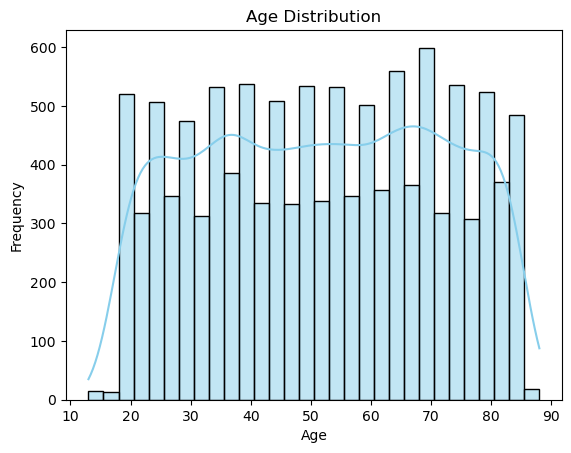

In [52]:
# Vizualization:
#Age distibution
plt.figure()
sns.histplot(df_cleaned["Age"], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

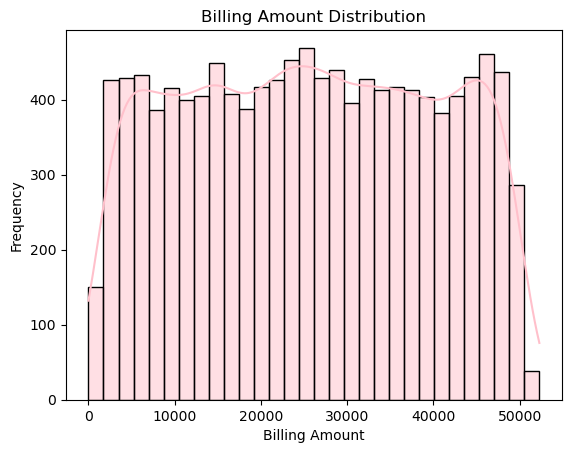

In [57]:
#Billing Amount Ditribution
plt.figure()
sns.histplot(df_cleaned["Billing Amount"], bins=30, kde=True, color="pink")
plt.title("Billing Amount Distribution")
plt.xlabel("Billing Amount")
plt.ylabel("Frequency")
plt.show()

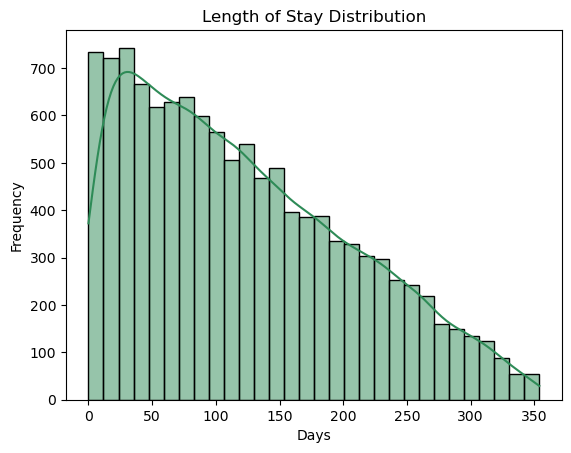

In [60]:
# Length of Stay Distribution
plt.figure()
sns.histplot(df_cleaned["Length of Stay"], bins=30, kde=True, color="seagreen")
plt.title("Length of Stay Distribution")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

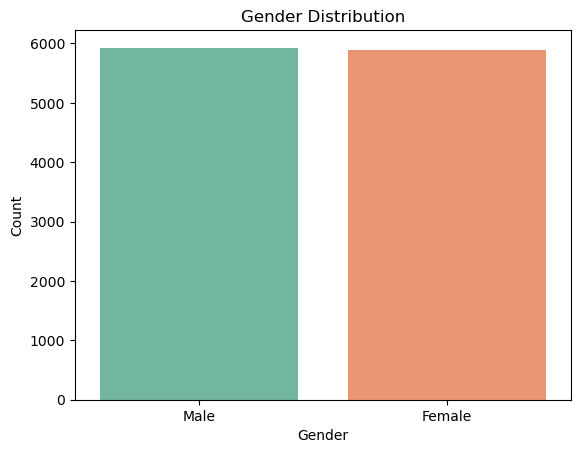

In [73]:
# Gender Distribution
plt.figure()
sns.countplot(x="Gender", data=df_cleaned, palette="Set2")
plt.title("Gender Distribution")
plt.ylabel("Count")
plt.show()

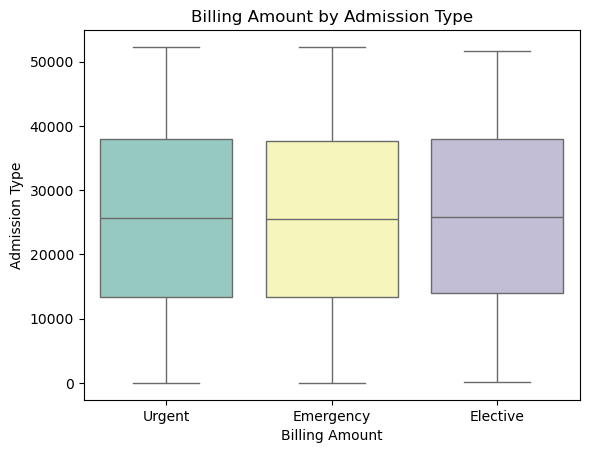

In [75]:
# Billing amount by Admission Type
plt.figure()
sns.boxplot(x="Admission Type", y="Billing Amount", data = df_cleaned, palette = "Set3")
plt.title("Billing Amount by Admission Type")
plt.xlabel("Billing Amount")
plt.ylabel("Admission Type")
plt.show()

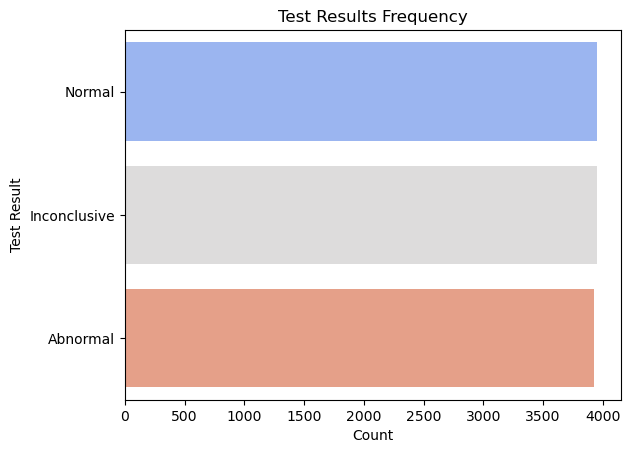

In [77]:
# Test Result Count
plt.figure()
sns.countplot(y="Test Results", data=df_cleaned, palette="coolwarm")
plt.title("Test Results Frequency")
plt.xlabel("Count")
plt.ylabel("Test Result")
plt.show()

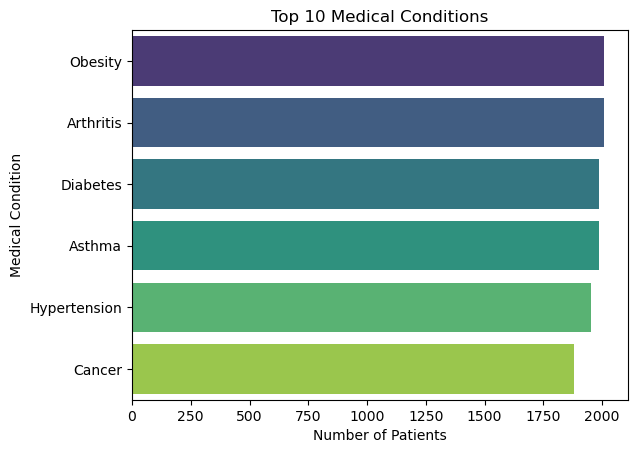

In [79]:
# Medicle Condition Freqency
plt.figure()
top_conditions = df_cleaned["Medical Condition"].value_counts().nlargest(10)
sns.barplot(x=top_conditions.values, y=top_conditions.index, palette="viridis")
plt.title("Top 10 Medical Conditions")
plt.xlabel("Number of Patients")
plt.ylabel("Medical Condition")
plt.show()

<Axes: xlabel='Medical Condition', ylabel='count'>

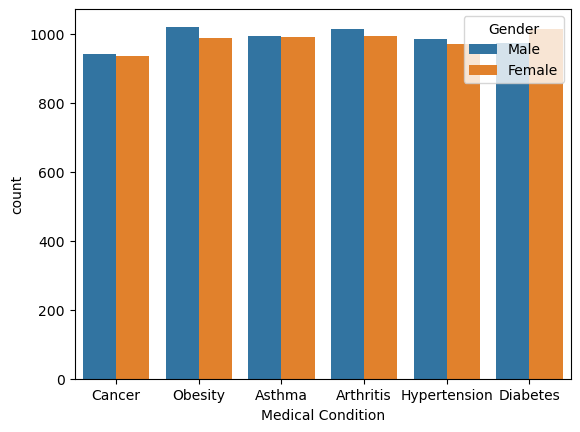

In [96]:
# Group by gender to identify trends
sns.countplot(data=df_cleaned, x='Medical Condition', hue='Gender')

<Axes: xlabel='Medical Condition', ylabel='Age'>

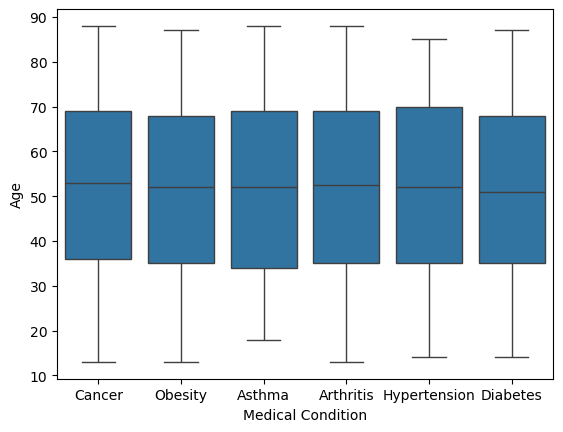

In [99]:
# Age distribution per condition
sns.boxplot(x='Medical Condition', y='Age', data=df_cleaned)

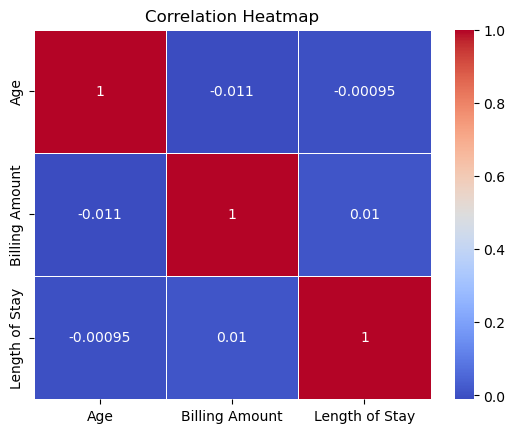

In [93]:
# Correlation Heatmap for Numerical Columns
plt.figure()
numerics = df_cleaned[["Age", "Billing Amount", "Length of Stay"]]
sns.heatmap(numerics.corr(), annot=True, cmap="coolwarm", linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
The analysis revealed key insights such as:
1.Age Distribution:Most patients fall within specific age ranges, helping identify age groups more prone to hospital admissions.
2.Gender Trends:The data shows how healthcare services are distributed across genders, revealing possible gender-specific health issues.
3.Billing Patterns:Observing billing amounts helped highlight typical treatment costs and detect outliers that may suggest complex or severe cases.
4.Length of Stay:Analyzing the number of days patients stayed in the hospital provided insights into treatment durations and hospital resource utilization.
5.Boxplots and count plots were used to visualize these trends and highlight possible risk factors.
6.Correlation heatmap was generated to visualize relationships between numerical features such as Age, Billing Amount, and Length of Stay.

In [ ]:
Conclusion:
This project demonstrates how data analysis can uncover actionable healthcare insights.
By identifying high-risk groups and understanding cost and condition patterns, 
this analysis supports smarter clinical planning, resource allocation, and patientcare strategies.